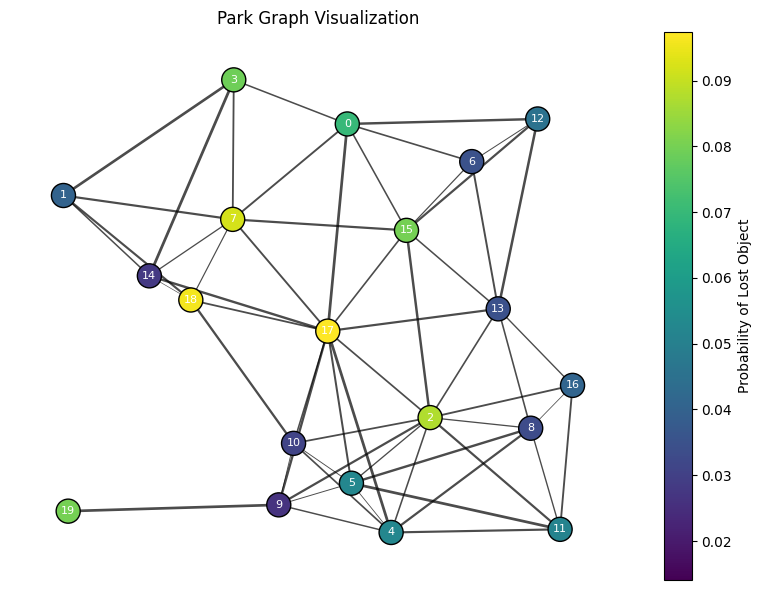

In [5]:
import time

from mthmodel_12_14.GraphGen import generate_park_graph
from mthmodel_12_14.GraphVis import visualize_park_graph


park_graph = generate_park_graph()
visualize_park_graph(park_graph)

In [6]:
for n in park_graph.nodes(data=True):
        print(f"Node {n[0]}: Position {n[1]['pos']}, Probability {n[1]['probability']:.2f}")
    

Node 0: Position (1157.5749139629659, 1663.2250838045723), Probability 0.07
Node 1: Position (120.60937339446798, 1395.9899067637975), Probability 0.03
Node 2: Position (1460.0734054008021, 566.2786545321314), Probability 0.09
Node 3: Position (742.7734337976913, 1827.9769930576476), Probability 0.08
Node 4: Position (1317.6859659528648, 137.19869700218146), Probability 0.05
Node 5: Position (1172.6703799112317, 321.1944459894689), Probability 0.05
Node 6: Position (1612.2868708097826, 1522.6045425807633), Probability 0.02
Node 7: Position (738.8892402386759, 1306.8434073844871), Probability 0.09
Node 8: Position (1827.5842661217557, 526.6792730991874), Probability 0.02
Node 9: Position (907.2121346965381, 240.38054130026288), Probability 0.01
Node 10: Position (961.2764169106605, 470.1075309663685), Probability 0.02
Node 11: Position (1935.0529645214897, 148.94521141739347), Probability 0.04
Node 12: Position (1853.1837188946547, 1681.8430082923558), Probability 0.04
Node 13: Position

Next I try to output the park graph without probabilty

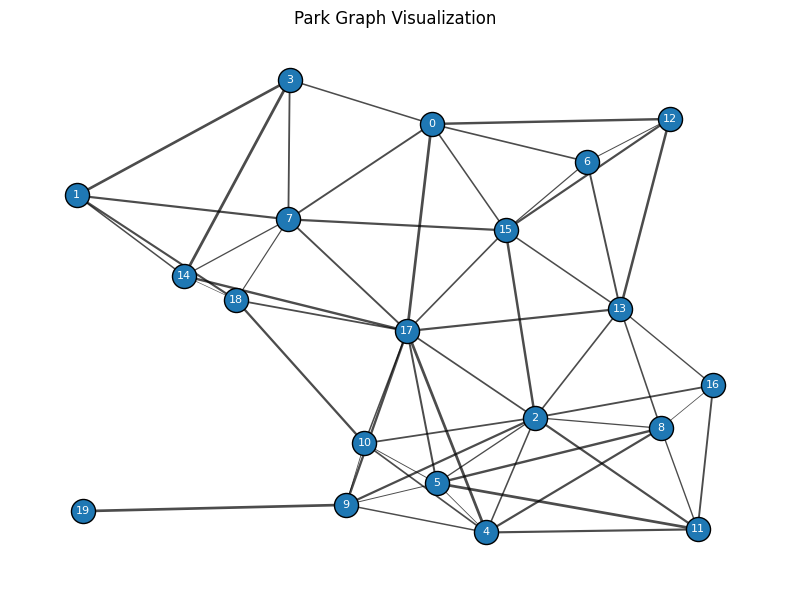

In [7]:
from mthmodel_12_14.GraphVisNoProb import visualize_park_graph_no_prob
visualize_park_graph_no_prob(park_graph)

Find MST of the park

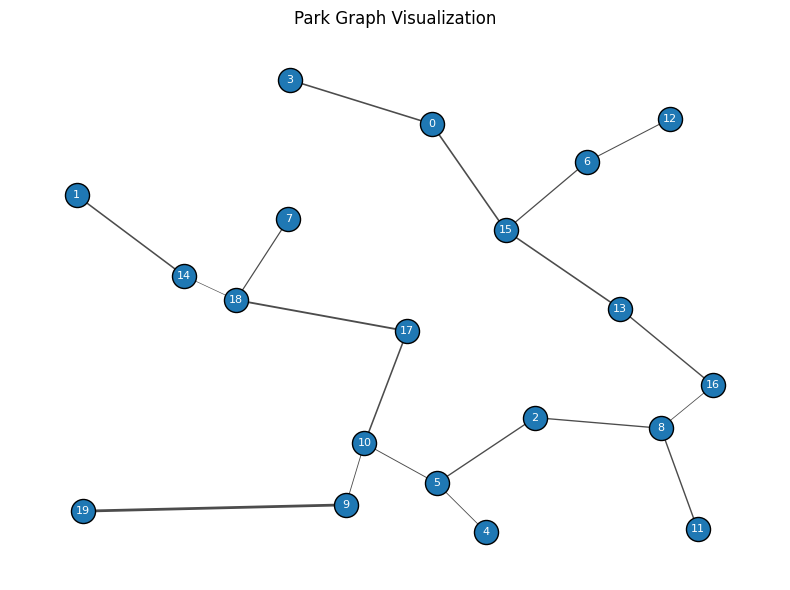

In [10]:
import networkx as nx

mst = nx.minimum_spanning_tree(park_graph, weight='weight')
visualize_park_graph_no_prob(mst)

Approximate TSP route (node order): [0, 15, 13, 16, 8, 11, 2, 5, 10, 17, 18, 7, 14, 1, 9, 19, 4, 6, 12, 3]


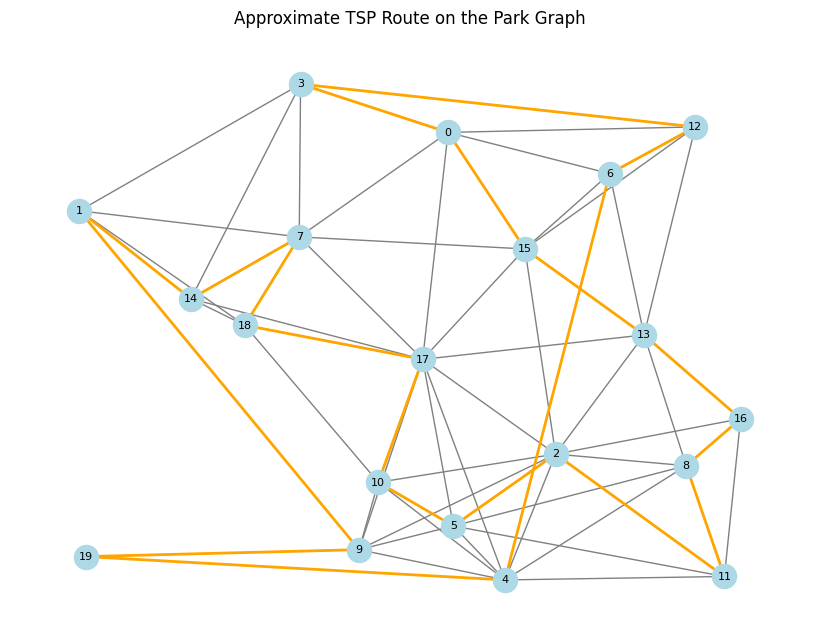

In [14]:
from matplotlib import pyplot as plt
from mthmodel_12_14.TSPApprox import approximate_tsp_route

route = approximate_tsp_route(park_graph)
print("Approximate TSP route (node order):", route)

# Optional: Visualize the original graph and the route
pos = nx.get_node_attributes(park_graph, 'pos')
plt.figure(figsize=(8,6))
nx.draw(park_graph, pos, with_labels=True, node_color='lightblue', node_size=300, font_size=8, edge_color='gray')
# Draw the TSP route as a path
route_edges = list(zip(route, route[1:] + [route[0]])) #make it a cycle
nx.draw_networkx_edges(park_graph, pos, edgelist=route_edges, edge_color='orange', width=2)
plt.title("Approximate TSP Route on the Park Graph")
plt.axis('off')
plt.show()

In [ ]:
import time

mst1 = nx.minimum_spanning_tree(park_graph, weight='weight')
doubled = nx.MultiGraph()
for u, v, data in mst1.edges(data=True):
    w = data['weight']
    doubled.add_edge(u, v, weight=w)
    doubled.add_edge(u, v, weight=w)  # Add the edge twice

eulerian_path1 = list(nx.eulerian_circuit(doubled))
pos = nx.get_node_attributes(park_graph, 'pos')
plt.figure(figsize=(8,6))
path_nodes = [eulerian_path1[0][0]] + [v for u,v in eulerian_path1]

# Draw the underlying graph first
nx.draw(park_graph, pos, with_labels=True, node_color='lightblue', node_size=300, font_size=8, edge_color='gray')

# Then draw the Eulerian path step by step
for i in range(len(path_nodes)-1):
    u = path_nodes[i]
    v = path_nodes[i+1]
    plt.plot([pos[u][0], pos[v][0]], [pos[u][1], pos[v][1]], color='orange', linewidth=2)
    time.sleep(1)
    plt.show()

for question2 

In [32]:
def compute_all_pairs_shortest_paths(G):
    """Compute shortest paths between all pairs in G using Dijkstra."""
    # Returns a dict of dict: dist[u][v] = shortest distance
    dist = dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))
    return dist


def approximate_tsp_route(nodes, dist_matrix):
    """
    Given a set of nodes and a distance matrix (dict of dict) containing shortest path
    distances between them, this function approximates a TSP route:
    1. Builds a complete graph on these nodes with the given distances.
    2. Finds an MST of that complete graph.
    3. Doubles the MST edges to get an Eulerian graph.
    4. Finds Eulerian tour.
    5. Shortcuts repeated nodes.
    Returns the route (list of nodes in order) and the total route distance.
    """

    # Build a complete graph K among the chosen nodes
    K = nx.Graph()
    for u in nodes:
        K.add_node(u)
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                K.add_edge(u, v, weight=dist_matrix[u][v])
                K.add_edge(v, u, weight=dist_matrix[v][u])

    # MST of K
    mst = nx.minimum_spanning_tree(K, weight='weight')

    # Double every edge in MST
    doubled = nx.MultiGraph()
    for u, v, data in mst.edges(data=True):
        w = data['weight']
        doubled.add_edge(u, v, weight=w)
        doubled.add_edge(u, v, weight=w)

    # Find Eulerian tour in doubled
    eulerian_path = list(nx.eulerian_circuit(doubled))

    # Shortcut to get TSP route
    visited = set()
    tsp_route = []
    for (u, v) in eulerian_path:
        if u not in visited:
            visited.add(u)
            tsp_route.append(u)
    # Include last node if needed
    last_node = eulerian_path[-1][1]
    if last_node not in visited:
        tsp_route.append(last_node)

    # Compute total distance of TSP route
    total_dist = 0.0
    for i in range(len(tsp_route)):
        u = tsp_route[i]
        v = tsp_route[(i+1) % len(tsp_route)]  # making it a cycle
        total_dist += dist_matrix[u][v]
    return tsp_route, total_dist


Selected nodes: [0, 3, 15, 6, 7, 12, 17, 18, 13, 14, 1, 2, 10, 16, 8, 5, 9, 4, 11, 19]
Approximate TSP route: [0, 15, 13, 16, 8, 11, 2, 5, 4, 10, 9, 19, 17, 18, 14, 1, 7, 6, 12, 3]
Total route length (m): 10699.572207323947


ValueError: 'c' argument has 17 elements, which is inconsistent with 'x' and 'y' with size 20.

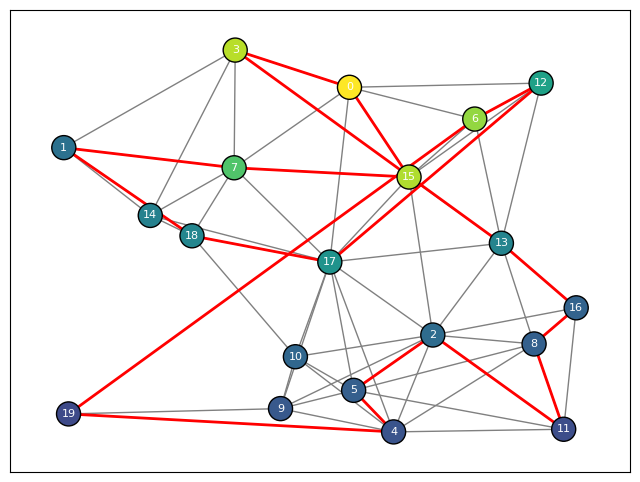

In [105]:
dist = compute_all_pairs_shortest_paths(park_graph)

# Extract nodes and their probabilities
probabilities = nx.get_node_attributes(park_graph, 'probability')
# Sort nodes by descending probability
sorted_nodes = sorted(probabilities.keys(), key=lambda n: probabilities[n], reverse=True)

# We have about 2 hours, walking speed ~6 km/h, total 12 km max
distance_limit = 12000.0  # assuming positions/distances are in meters
# Start choosing nodes from highest probability down
chosen_nodes = []
best_route = []
best_dist = float('inf')

for node in sorted_nodes:
    trial_nodes = chosen_nodes + [node]
    if len(trial_nodes) == 1:
        # If only one node, distance = 0
        trial_dist = 0.0
        trial_route = trial_nodes
    else:
        # Use shortest paths from dist
        # We need a sub-dist matrix for these nodes
        sub_dist = {u: {} for u in trial_nodes}
        for u in trial_nodes:
            for v in trial_nodes:
                if u == v:
                    sub_dist[u][v] = 0.0
                else:
                    sub_dist[u][v] = dist[u][v]

        trial_route, trial_dist = approximate_tsp_route(trial_nodes, sub_dist)

    # Check if the trial route fits within the 12 km limit
    if trial_dist <= distance_limit:
        chosen_nodes = trial_nodes
        best_route = trial_route
        best_dist = trial_dist
    else:
        # Can't add more nodes without exceeding limit, stop
        break

print("Selected nodes:", chosen_nodes)
print("Approximate TSP route:", best_route)
print("Total route length (m):", best_dist)

# Visualization
pos = nx.get_node_attributes(park_graph, 'pos')

# Get probability list in node order to create a color map
probs_list = [probabilities[n] for n in park_graph.nodes()]
cmap = plt.cm.viridis
max_prob = max(probs_list)
node_colors = [cmap(p / max_prob) for p in probs_list]
fig, ax = plt.subplots(figsize=(8,6))

# Draw the graph on the given axes
nx.draw_networkx_nodes(park_graph, pos, node_color=node_colors, node_size=300, edgecolors='black', ax=ax)
nx.draw_networkx_labels(park_graph, pos, font_size=8, font_color='white', ax=ax)
nx.draw_networkx_edges(park_graph, pos, edge_color='gray', ax=ax)

# Draw the route edges and chosen nodes
nx.draw_networkx_edges(park_graph, pos, edgelist=route_edges, edge_color='red', width=2, ax=ax)
nx.draw_networkx_nodes(park_graph, pos, nodelist=chosen_nodes, 
                       node_color=chosen_node_colors, node_size=300, 
                       edgecolors='black', linewidths=2, ax=ax)

# Add the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(probs_list), vmax=max(probs_list)))
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax)  # specify ax so colorbar knows where to attach
cbar.set_label('Probability of Lost Object')

ax.set_title("High-Probability Nodes TSP Approximation Route with Probability Color Map")
ax.axis('off')
plt.tight_layout()
plt.show()

for question 3

In [94]:
import math
def reassign_probabilities(G, reference_node=0):
    """
    Reassign probabilities to each node in G based on proximity to a reference_node.
    Nodes closer to reference_node get higher probability.

    Parameters:
    - G: A NetworkX graph with 'pos' attributes for each node.
    - reference_node: The node index where the jogger started (default=0).
    """

    # Get the position of the reference node (jogger's start)
    ref_pos = G.nodes[reference_node]['pos']

    # Compute distances and weights
    weights = {}
    for n in G.nodes():
        x, y = G.nodes[n]['pos']
        dist = math.sqrt((x - ref_pos[0])**2 + (y - ref_pos[1])**2)
        # Weight: inversely related to distance
        if dist ==0 : 
            weights[n] = 0.0025
        else:
            w = 1.0 / (dist +1.0)
            weights[n] = w

    # Normalize weights to form a probability distribution
    total_weight = sum(weights.values())
    for n in G.nodes():
        prob = weights[n] / total_weight
        G.nodes[n]['probability'] = prob

    # Now each node has a probability that is higher near the reference_node and lower far away.


In [95]:
reassign_probabilities(park_graph, reference_node=0)

# Print the newly assigned probabilities
for n in park_graph.nodes(data=True):
    print(f"Node {n[0]}: Probability = {n[1]['probability']:.4f}")

Node 0: Probability = 0.1027
Node 1: Probability = 0.0383
Node 2: Probability = 0.0361
Node 3: Probability = 0.0918
Node 4: Probability = 0.0267
Node 5: Probability = 0.0306
Node 6: Probability = 0.0861
Node 7: Probability = 0.0745
Node 8: Probability = 0.0311
Node 9: Probability = 0.0284
Node 10: Probability = 0.0339
Node 11: Probability = 0.0241
Node 12: Probability = 0.0589
Node 13: Probability = 0.0464
Node 14: Probability = 0.0446
Node 15: Probability = 0.0906
Node 16: Probability = 0.0321
Node 17: Probability = 0.0528
Node 18: Probability = 0.0471
Node 19: Probability = 0.0232


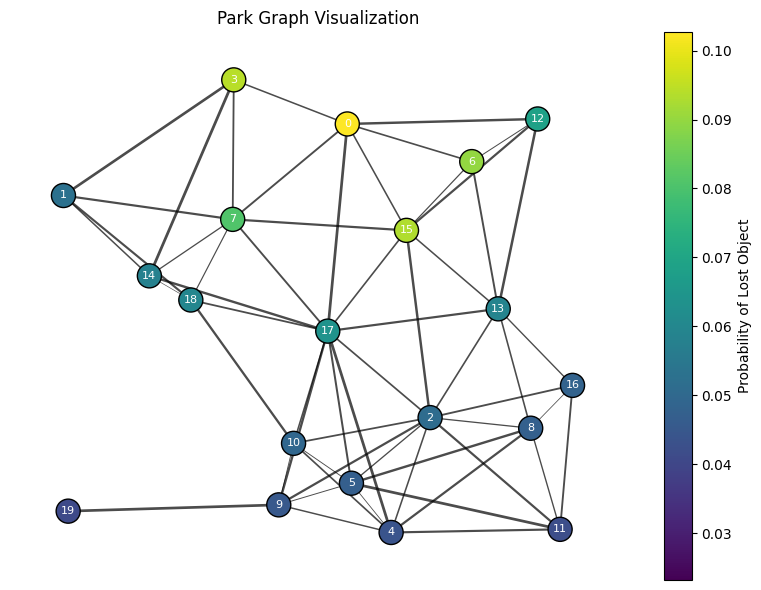

In [96]:
visualize_park_graph(park_graph)

Selected nodes: [0, 3, 15, 6, 7, 12, 17, 18, 13, 14, 1, 2]
Approximate TSP route: [0, 15, 17, 18, 14, 1, 7, 13, 2, 6, 12, 3]
Total route length (m): 7145.25773216697


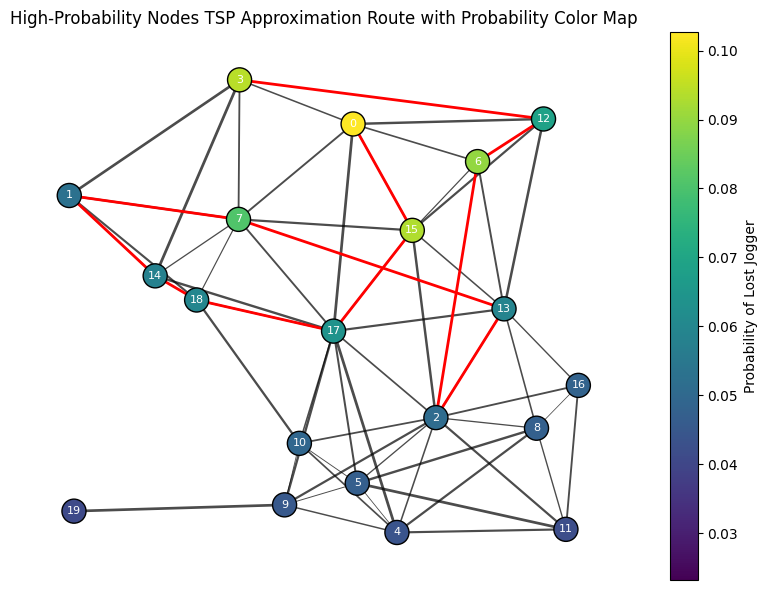

In [106]:
dist = compute_all_pairs_shortest_paths(park_graph)

# Extract nodes and their probabilities
probabilities = nx.get_node_attributes(park_graph, 'probability')
# Sort nodes by descending probability
sorted_nodes = sorted(probabilities.keys(), key=lambda n: probabilities[n], reverse=True)


distance_limit = 8000.0  # assuming positions/distances are in meters
# Start choosing nodes from highest probability down
chosen_nodes = []
best_route = []
best_dist = float('inf')

for node in sorted_nodes:
    trial_nodes = chosen_nodes + [node]
    if len(trial_nodes) == 1:
        # If only one node, distance = 0
        trial_dist = 0.0
        trial_route = trial_nodes
    else:
        # Use shortest paths from dist
        # We need a sub-dist matrix for these nodes
        sub_dist = {u: {} for u in trial_nodes}
        for u in trial_nodes:
            for v in trial_nodes:
                if u == v:
                    sub_dist[u][v] = 0.0
                else:
                    sub_dist[u][v] = dist[u][v]

        trial_route, trial_dist = approximate_tsp_route(trial_nodes, sub_dist)

    # Check if the trial route fits within the  limit
    if trial_dist <= distance_limit:
        chosen_nodes = trial_nodes
        best_route = trial_route
        best_dist = trial_dist
    else:
        # Can't add more nodes without exceeding limit, stop
        break

print("Selected nodes:", chosen_nodes)
print("Approximate TSP route:", best_route)
print("Total route length (m):", best_dist)

# Visualization
pos = nx.get_node_attributes(park_graph, 'pos')

 # Create a figure and an axes object explicitly
fig, ax = plt.subplots(figsize=(8, 6))


# Extract node probabilities for color mapping
probabilities = nx.get_node_attributes(park_graph, 'probability')
G = park_graph
# Create a list of probabilities in node order
probs_list = [probabilities[n] for n in G.nodes()]

# Set up a color map for probabilities
cmap = plt.cm.viridis
node_colors = [cmap(p / max(probs_list)) for p in probs_list]

# Draw the nodes on the specified axes
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=300, edgecolors='black', ax=ax)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='white', ax=ax)

# Draw edges with weights
edges = G.edges(data=True)
weights = [e[2]['weight'] for e in edges]

# Normalize edge widths for better visuals
max_w = max(weights) if weights else 1
widths = [2.0 * (w / max_w) for w in weights]

nx.draw_networkx_edges(G, pos, width=widths, alpha=0.7, ax=ax)

# Create a colorbar for probabilities
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(probs_list), vmax=max(probs_list)))
sm.set_array([])

# Pass the axes to plt.colorbar so it knows where to place it
cbar = plt.colorbar(sm, ax=ax)

#get route list
route_edges = list(zip(best_route, best_route[1:]))
# Draw the route edges and chosen nodes
nx.draw_networkx_edges(park_graph, pos, edgelist=route_edges, edge_color='red', width=2, ax=ax)

cbar.set_label('Probability of Lost Jogger')

ax.set_title("High-Probability Nodes TSP Approximation Route with Probability Color Map")
ax.axis('off')
plt.tight_layout()
plt.show()